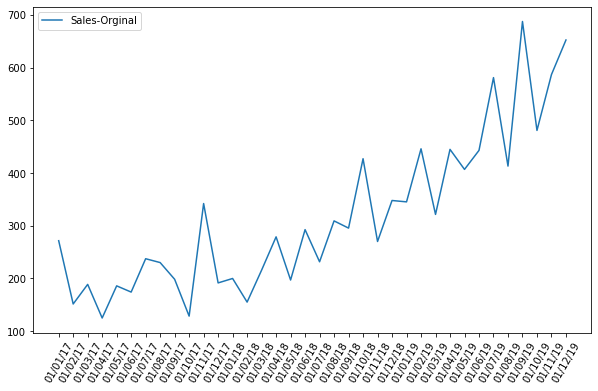

In [3]:
## moving averages

# import needful libs
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# read dataset
sales_data = pd.read_csv('sales.csv')

# setting figure size
plt.figure(figsize=(10,6))

# plot orginal sales data
plt.plot(sales_data['Time'], sales_data['Sales'], 
         label = "Sales-Orginal")

# rotate xlabels
plt.xticks(rotation=60)

# add legends
plt.legend()

# display the plot
plt.show()

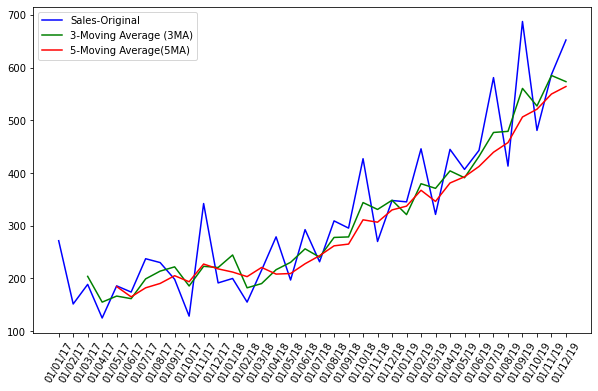

In [4]:
# moving average with window 3
sales_data['3MA'] = sales_data['Sales'].rolling(window=3).mean()

# moving average with window 5
sales_data['5MA'] = sales_data['Sales'].rolling(window=5).mean()

# setting figure size
plt.figure(figsize=(10,6))

# plot orginal sales data
plt.plot(sales_data['Time'], sales_data['Sales'], 
        label="Sales-Original", color="blue")

# plot 3-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], 
         label="3-Moving Average (3MA)", color="green")

# plot 5-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], 
        label="5-Moving Average(5MA)", color="red")

# rotate xlabels
plt.xticks(rotation=60)

# add legends
plt.legend()

# display the plot
plt.show()

<AxesSubplot:xlabel='Time'>

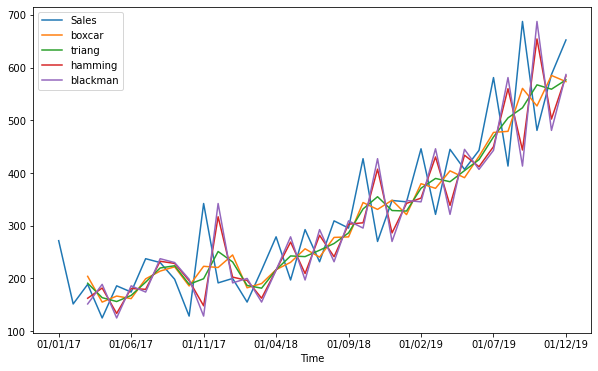

In [6]:
# window functions

# import needful libraries - loaded in first command
#import pandas as pd
#import statsmodels.api as sm
#import matplotlib.pyplot as plt

# read dataset
sales_data = pd.read_csv('sales.csv', index_col="Time")

# apply all the windows on given DataFrame
sales_data['boxcar'] = sales_data.Sales.rolling(3, win_type='boxcar').mean()
sales_data['triang'] = sales_data.Sales.rolling(3, win_type='triang').mean()
sales_data['hamming'] = sales_data.Sales.rolling(3, win_type='hamming').mean()
sales_data['blackman'] = sales_data.Sales.rolling(3, win_type='blackman').mean()

# plot the rolling mean of all the windows
sales_data.plot(kind='line', figsize=(10,6))

In [7]:
# defining cointegration

# import required libs
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import numpy as np

# calculate ADF function
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()
    return ts.adfuller(result.resid)

# read the Dataset
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)


In [9]:
# create Sine wave and apply ADF test
t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (3.956319476495162e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21598.896016765088)


In [10]:
# apply ADF test on Sine and Sine with noise
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-17.62552157029604, 3.8203908287165654e-30, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1855.506811043978)


In [11]:
# apply ADF test on Sine and Cosine with noise
cosine = 100 * np.cos(t) + 10

print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-6.374451613018041, 2.302155686948863e-08, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -10037.933932666414)


In [12]:
print("Sine vs sunspots", calc_adf(sine, data))

Sine vs sunspots (-6.7242691810701, 3.4210811915549524e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


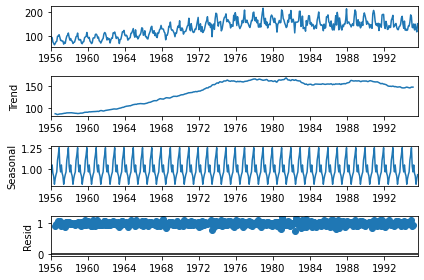

In [1]:
# STL decomposition

# import needful libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# read the data dataset
data = pd.read_csv('beer_production.csv')
data.columns = ['date', 'data']

# change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')

# plot decomposed data
decomposed_data.plot()

# display the plot
plt.show()

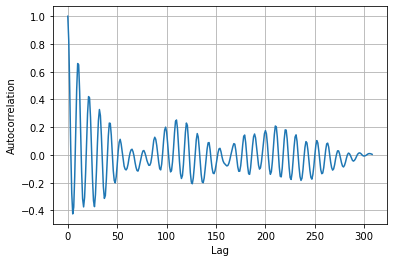

In [3]:
# autocorrelation

# import needful libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# read the dataset
data = sm.datasets.sunspots.load_pandas().data

# calculate autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)

# cross-correlation
sun_correlated = np.correlate(dy, dy, mode='full') / dy_square
result = sun_correlated[int(len(sun_correlated)/2):]

# display the chart
plt.plot(result)

# display grid
plt.grid(True)

# add labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

# display the chart
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

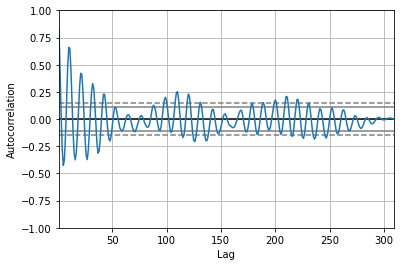

In [5]:
from pandas.plotting import autocorrelation_plot

# plot using pandas function
autocorrelation_plot(data.SUNACTIVITY)

In [17]:
# autoregressive models

# import needful libs
# library change from from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

# read the dataset 
data = sm.datasets.sunspots.load_pandas().data

# split data into train and test set
train_ratio = 0.8

train = data[:int(train_ratio*len(data))]
test = data[int(train_ratio*len(data)):]

# autoregression Model training
ar_model = AutoReg(train.SUNACTIVITY, 20)
ar_model = ar_model.fit()

# print lags and model coefficients
print("Number of Lars: ", ar_model.summary)
print("Model Coefficients:\n", ar_model.params)


Number of Lars:  <bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x000002046E41F220>>
Model Coefficients:
 const              12.189240
SUNACTIVITY.L1      1.193347
SUNACTIVITY.L2     -0.487991
SUNACTIVITY.L3     -0.132572
SUNACTIVITY.L4      0.200282
SUNACTIVITY.L5     -0.189088
SUNACTIVITY.L6      0.063540
SUNACTIVITY.L7     -0.027693
SUNACTIVITY.L8      0.099539
SUNACTIVITY.L9      0.147040
SUNACTIVITY.L10    -0.104183
SUNACTIVITY.L11     0.197207
SUNACTIVITY.L12    -0.075315
SUNACTIVITY.L13    -0.135734
SUNACTIVITY.L14     0.181400
SUNACTIVITY.L15    -0.108997
SUNACTIVITY.L16     0.002903
SUNACTIVITY.L17     0.099517
SUNACTIVITY.L18    -0.205439
SUNACTIVITY.L19     0.042356
SUNACTIVITY.L20    -0.023225
dtype: float64


In [19]:
# make predictions
start_point = len(train)
end_point = start_point + len(test) - 1
pred = ar_model.predict(start=start_point, end=end_point, dynamic=False)

# calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  36.36004069801688
MSE:  2416.2348267095017
RMSE:  49.15521159256159


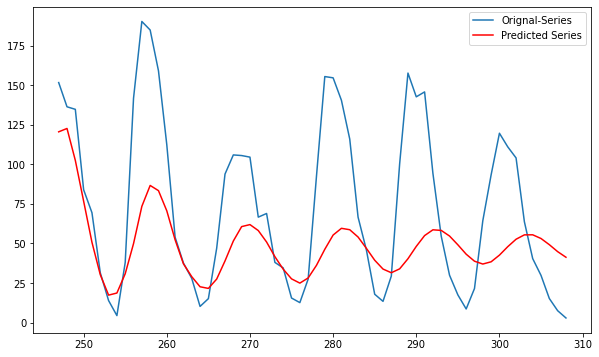

In [20]:
# setting figure size 
plt.figure(figsize=(10, 6))

# plot test data
plt.plot(test.SUNACTIVITY, label='Orignal-Series')

# plot predictions
plt.plot(pred, color='red', label='Predicted Series')

# add legends
plt.legend()

# display the plot
plt.show()

In [35]:
# ARMA models

# import needful libraries
import statsmodels.api as sm
# removed: from statsmodels.tsa.arima_model import ARIMA 
# replaced on:
from statsmodels.tsa.api import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# read the dataset
data = sm.datasets.sunspots.load_pandas().data
data.drop('YEAR', axis=1, inplace=True)

# split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio*len(data))]
test = data[int(train_ratio*len(data)):]

# AutoRegression Model training
arma_model = ARIMA(train, order=(7,1,2))
arma_model = arma_model.fit()

# make predictions
start_point = len(train)
end_point = start_point + len(test) - 1
pred = arma_model.predict(start_point, end_point)

# calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE: ", mae)
print("MSE: ", mse)
print("EMSE: ", rmse)

MAE:  31.27864467599967
MSE:  1482.6106300479853
EMSE:  38.50468322227811


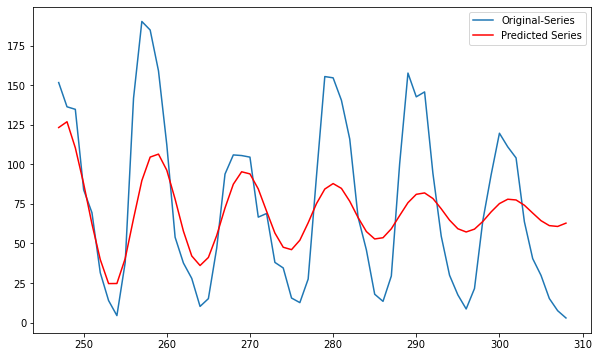

In [36]:
# setting figure size
plt.figure(figsize=(10,6))

# plot test data
plt.plot(test, label='Original-Series')

# plot predictions
plt.plot(pred, color='red', label='Predicted Series')

# add legends
plt.legend()

# display the plot
plt.show()

In [38]:
# generating periodic signals

# import required libs
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# create model function
def model(p, t):
    C, p1, f1, phi1, p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) + p3 * np.sin(f3 * t + phi3)

# create error function
def error(p, y, t):
    return y - model(p,t)

# create fit function
def fit(y, t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args = (y, t))[0]
    return params

# load the dataset
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

# apply and fit the model
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]



Params [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]


In [41]:
print("Params", params)
print("Root mean square error", np.sqrt(np.mean(actual - pred) **2))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred) / 2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 2). sum() / ((actual - actual.mean()) ** 2).sum())


Params [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]
Root mean square error 35.83089088049339
Mean absolute error 44.581468315714496
Mean absolute percentage error 65.16404904506578
Symmetric Mean absolute percentage error 78.44776724314043
Coefficient of determination -0.36352579271706853


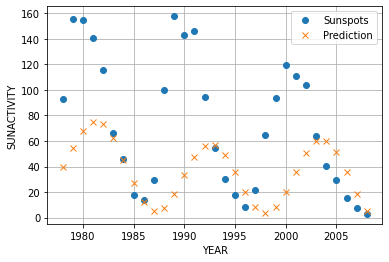

In [42]:
year_range = data_loader.data["YEAR"].values[cutoff:]

# plot the actual and predicted data points
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)

# Add labels
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")

# add legend
plt.legend()

# display the chart
plt.show()

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


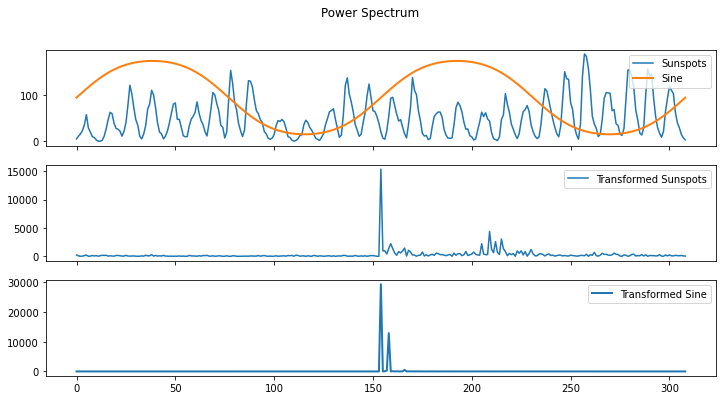

In [5]:
# fourier analysis

# import required library
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

# read the dataset
data = sm.datasets.sunspots.load_pandas().data

# create Sine wave
t = np.linspace(-2 * np.pi, 2 * np.pi, len(data.SUNACTIVITY.values))
mid = np.ptp(data.SUNACTIVITY.values) / 2
sine = mid + mid * np.sin(np.sin(t))

# compute FFT for Sine wave
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])

# compute FFT for sunsports dataset
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

# create subplots
fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].plot(sine, lw=2, label="Sine")
axs[0].legend() # set legends
axs[1].plot(transformed, label="Transformed Sunspots")
axs[1].legend() # set legends
axs[2].plot(sine_fft, lw=2, label="Transformed Sine")
axs[2].legend() # set legends

# display the chart
plt.show()

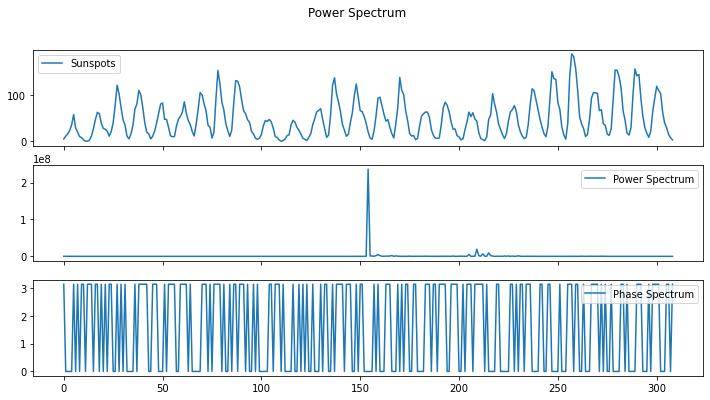

In [6]:
# spectral analysis filtering

# import required library
import numpy as np
import statsmodels.api as sm
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

# read the dataset
data = sm.datasets.sunspots.load_pandas().data

# compute FFT
transformed = fftshift(rfft(data.SUNACTIVITY.values))

# compute Power Spectrum
power = transformed ** 2

# compute Phase
phase = np.angle(transformed)

# create subplots
fig, axs = plt.subplots(3, figsize=(12,6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].legend() # set legends
axs[1].plot(power, label="Power Spectrum")
axs[1].legend() # set legends
axs[2].plot(phase, label="Phase Spectrum")
axs[2].legend() # set legends

# display the chart
plt.show()